In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

## Loading the dataset

In [2]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df["species"].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [4]:
# For simplicity just select 'petal length' and 'petal width' columns and just 'setosa' and 'versicolor' labels.
df = df.query("species == 'setosa' | species == 'versicolor' ")
df = df.drop(columns=["sepal_length", "sepal_width"])
df

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa
...,...,...,...
95,4.2,1.2,versicolor
96,4.2,1.3,versicolor
97,4.3,1.3,versicolor
98,3.0,1.1,versicolor


In [5]:
df["species"].value_counts()

species
setosa        50
versicolor    50
Name: count, dtype: int64

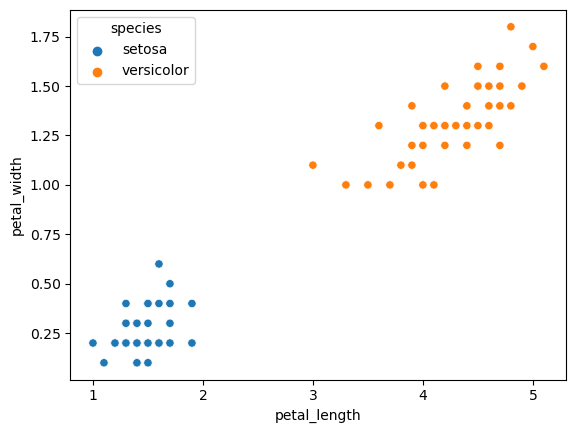

In [6]:
sns.scatterplot(data=df, x="petal_length", y="petal_width", hue="species");

## Summary information about the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   petal_length  100 non-null    float64
 1   petal_width   100 non-null    float64
 2   species       100 non-null    object 
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


## Define X, y values

In [8]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
print(X.shape)
print(y.shape)

(100, 2)
(100,)


## Splitting the dataset to Train and Test

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(80, 2) (20, 2)
(80,) (20,)


## Create the classifications models

In [10]:
svm_clf = SVC(C=100, kernel="linear")
svm_clf.fit(X_train, y_train)

SVC(C=100, kernel='linear')

## Using Cross Validation


model accurary is: 1.000

confusion matrix:
[[10  0]
 [ 0 10]]

classification report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



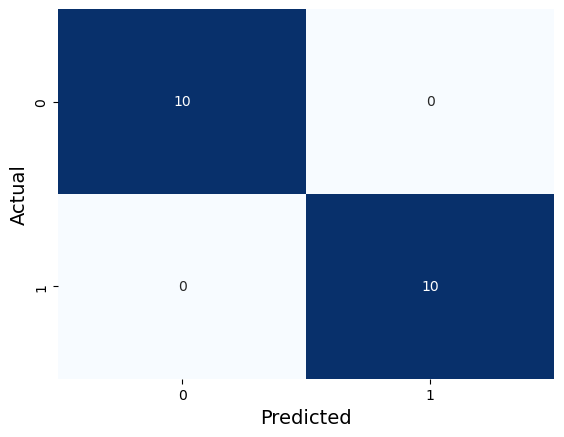

In [11]:
y_pred = svm_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"\nmodel accurary is: {acc:.3f}")
print(f"\nconfusion matrix:\n{cm}")
print(f"\nclassification report:\n{report}")
ax = sns.heatmap(cm, annot=True, cmap="Blues", cbar=False)
ax.set_xlabel("Predicted", fontsize=14)
ax.set_ylabel("Actual", fontsize=14);

## Plotting the Hyperplane

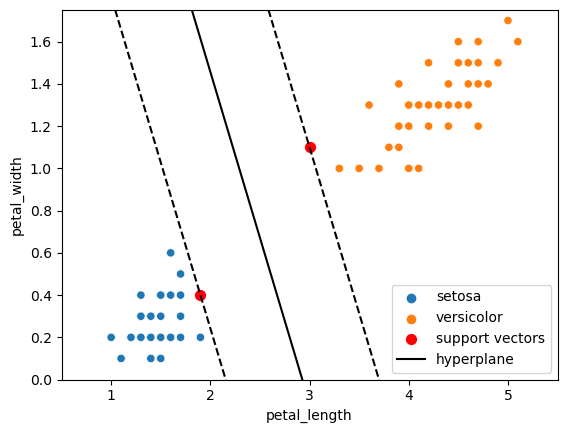

In [14]:
# Decision Boundary:
# w0*x0 + w1*x1 + b = 0
# x1 = -(w0/w1)*x0 - (b/w1)
w0, w1 = svm_clf.coef_[0]
b = svm_clf.intercept_[0]
x0 = np.linspace(1, 5)
decision_boundary = -(w0 / w1) * x0 - (b / w1)
margin = 1 / w1

support_vectors = svm_clf.support_vectors_
sns.scatterplot(data=df, x="petal_length", y="petal_width", hue="species")
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=50, facecolor="red", label="support vectors")
plt.plot(x0, decision_boundary, "k-", label="hyperplane")
plt.plot(x0, decision_boundary + margin, "k--")
plt.plot(x0, decision_boundary - margin, "k--")
plt.axis([0.5, 5.5, 0, 1.75])
plt.legend()
plt.show()